In [2]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# Download stock data for GOLD

ticker = yf.Ticker("GOLD")
df = ticker.history(period="2y")
df.ta.log_return(cumulative=True, append=True)
df.ta.percent_return(cumulative=True, append=True)
df = df.drop(["Dividends", "Stock Splits"], axis=1)
 
# New Columns with results
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'CUMLOGRET_1', 'CUMPCTRET_1'], dtype='object')

In [5]:
# Calculate technical indicators
df['SMA_10'] = ta.sma(df['Close'], length=10)  # 10-day Simple Moving Average
df['SMA_50'] = ta.sma(df['Close'], length=50)  # 200-day Simple Moving Average
df['RSI'] = ta.rsi(df['Close'], length=14)  # Relative Strength Index
 
df.ta.macd(close='Close', fast=8, slow=21, signal=5, append=True)
df= df.rename(columns={"MACD_8_21_5": "MACD", "MACDh_8_21_5": "MACD_hist","MACDs_8_21_5":"MACD_signal"})

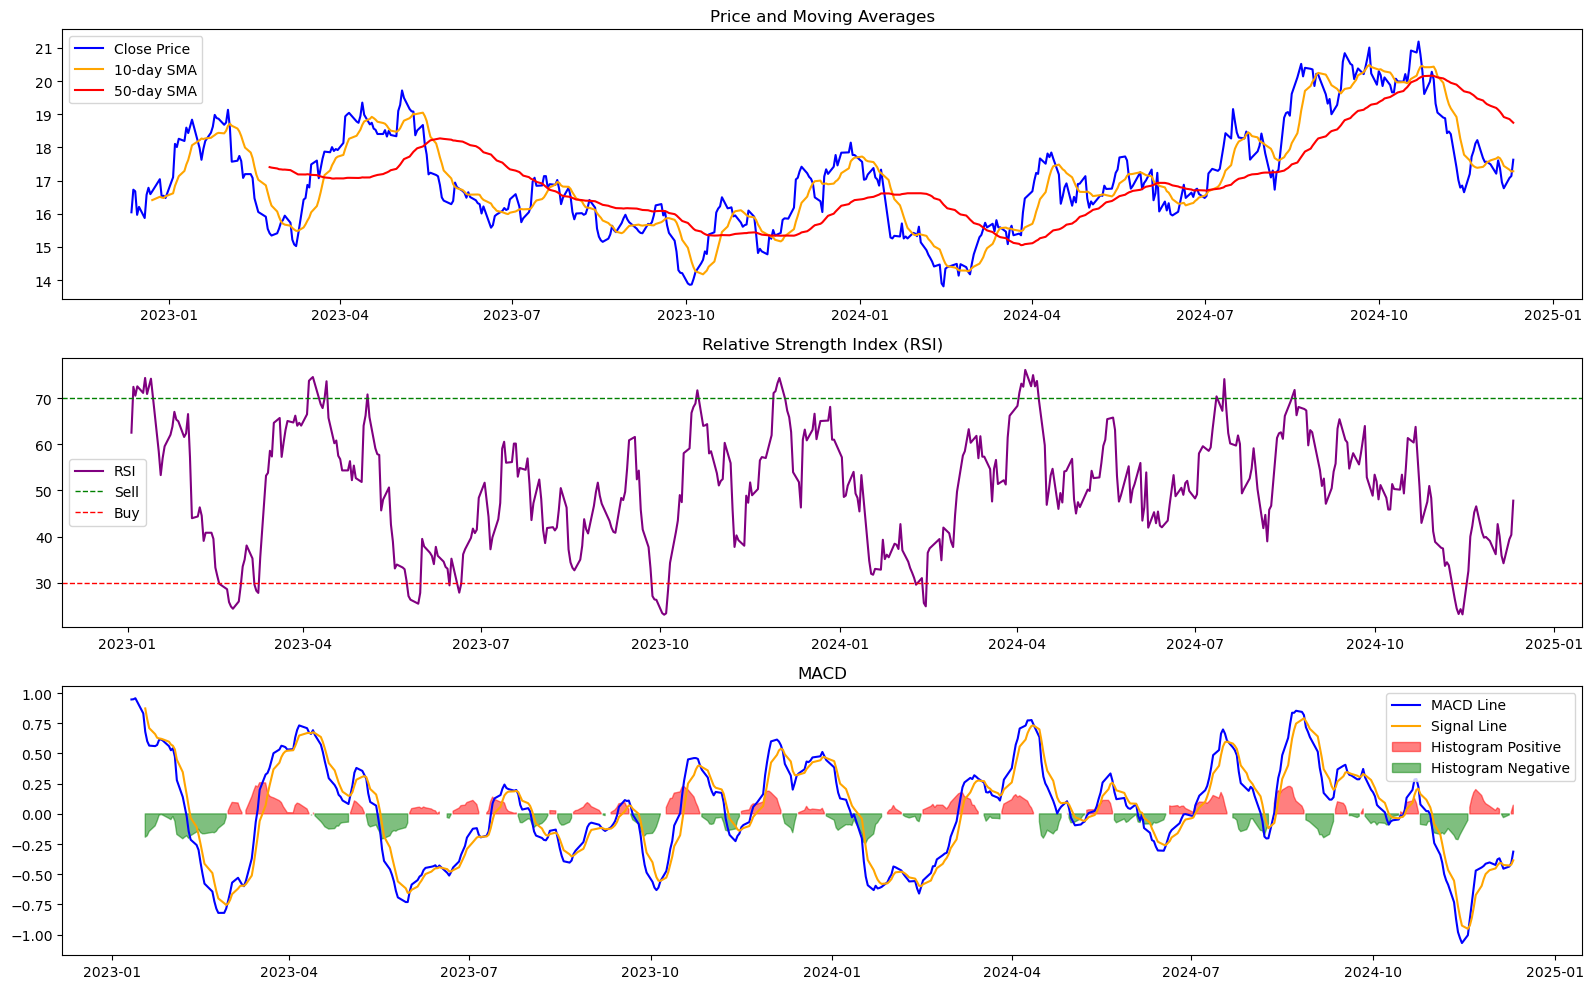

In [8]:
# Plot the data
plt.figure(figsize=(16, 10))

# Plot price and moving averages
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_10'], label='10-day SMA', color='orange')
plt.plot(df['SMA_50'], label='50-day SMA', color='red')
plt.title("Price and Moving Averages")
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='green', label='Sell',linestyle='--', linewidth=1)
plt.axhline(30, color='red', label='Buy',linestyle='--', linewidth=1)
plt.title("Relative Strength Index (RSI)")
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(df.index, df['MACD'], label='MACD Line', color='blue')
plt.plot(df.index, df['MACD_signal'], label='Signal Line', color='orange')
plt.fill_between(df.index, df['MACD_hist'], 0, where=df['MACD_hist'] > 0, 
                 color='red', alpha=0.5, label='Histogram Positive')
plt.fill_between(df.index, df['MACD_hist'], 0, where=df['MACD_hist'] < 0, 
                 color='green', alpha=0.5, label='Histogram Negative')
plt.title("MACD")
plt.legend()
plt.tight_layout()
plt.show()